In [38]:
# https://github.com/derekgreene/topic-model-tutorial/blob/master/2%20-%20NMF%20Topic%20Models.ipynb
import joblib
import numpy as np
from sklearn import decomposition
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# settings for our plots later
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [39]:
(A, terms, snippets) = joblib.load("articles-tfidf.pkl")
print("Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]))

Loaded 28 X 78 document-term matrix


In [40]:
# nomber of topics
k = 15

In [41]:
# create the model, specifiying the initialization strategy and the number of topics to produce
model = decomposition.NMF(init="nndsvd", n_components=k) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [42]:
W.shape

(28, 15)

In [43]:
# round to 2 decimal places for display purposes
W[0,:].round(2)

array([0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.86, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ])

In [44]:
H.shape

(15, 78)

In [45]:
term_index = terms.index('testing')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.05, 0.04, 0.01, 0.02, 0.14,
       0.09, 0.08, 0.  , 0.  ])

In [46]:
def get_descriptor(terms, H, topic_index, top):
    # reverse sort the values to sort the indices
    top_indices = np.argsort(H[topic_index,:])[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(terms[term_index])
    return top_terms

In [47]:
descriptors = []
for topic_index in range(k):
    descriptors.append(get_descriptor( terms, H, topic_index, 5))
    str_descriptor = ", ".join(descriptors[topic_index])
    print("Topic %02d: %s" % (topic_index+1, str_descriptor))

Topic 01: systems, physical, cyber, based, study
Topic 02: innovation, digital, business, ecosystems, ecosystem
Topic 03: data, smart, management, internet, tools
Topic 04: cps, platform, services, physical, cyber
Topic 05: ecosystem, complex, potential, tools, provide
Topic 06: computing, future, systems, ecosystems, based
Topic 07: analysis, interoperability, software, models, role
Topic 08: applications, platforms, computing, based, solutions
Topic 09: model, systems, approach, models, physical
Topic 10: devices, internet, cloud, approach, services
Topic 11: engineering, industry, software, industrial, systematic
Topic 12: digital, software, development, engineering, systems
Topic 13: ecosystems, literature, systematic, software, ecosystem
Topic 14: ecosystems, systems, software, architecture, enabling
Topic 15: opportunities, systems, cyber, cloud, software


In [48]:
def plot_top_term_weights(terms, H, topic_index, top):
    # get the top terms and their weights
    top_indices = np.argsort(H[topic_index,:])[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append(terms[term_index])
        top_weights.append(H[topic_index,term_index])
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

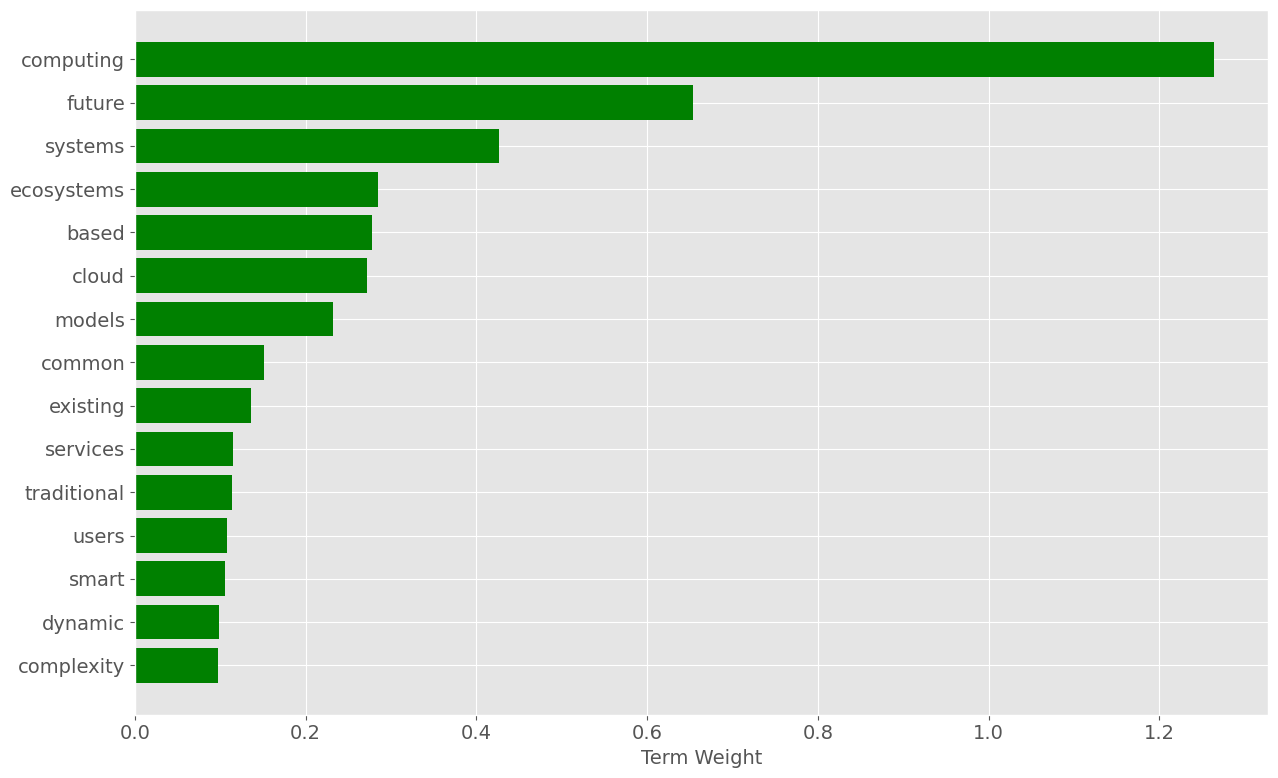

In [49]:
plot_top_term_weights(terms, H, 5, 15) # Topic (X-1)

In [50]:
def get_top_snippets(all_snippets, W, topic_index, top):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append(all_snippets[doc_index])
    return top_snippets

In [51]:
topic_snippets = get_top_snippets(snippets, W, 12, 15)
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ((i+1), snippet ))

01. Quality assurance in software ecosystems: A systematic literature mapping and research agenda;	Quali
02. Stakeholders collaborations, challenges and emerging concepts in digital twin ecosystems;	Definition
03. Automotive software engineering: A systematic mapping study;	Automotive software engineering, Automo
04. Contemporary Challenges when Developing Cyber-Physical Systems of Systems - A Case Study;	Case Study
05. Automated analysis of feature models: Quo vadis?;	Automated analysis, Feature models, Software produ
06. Digital Transformation and Innovation and Business Ecosystems: A Bibliometric Analysis for Conceptua
07. NLES: A novel lifetime extension scheme for safety-critical cyber-physical systems using SDN and NFV
08. IoT-big data software ecosystems for smart cities sensing: challenges, open issues, and emerging sol
09. Internet of Things and Big Data: the disruption of the value chain and the rise of new software ecos
10. A Cloud-Based and Dynamic DNS Approach to Enable th

In [52]:
topic_snippets = get_top_snippets(snippets, W, 5, 15)
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ((i+1), snippet))

01. Elastic systems: Towards cyber-physical ecosystems of people, processes, and things;	Cloud, Elastici
02. IoT-big data software ecosystems for smart cities sensing: challenges, open issues, and emerging sol
03. Automated analysis of feature models: Quo vadis?;	Automated analysis, Feature models, Software produ
04. Models@run.time for creating in-cloud dynamic cyber-physical ecosystems;	Cloud, Cyber-physical syste
05. A Cloud-Based and Dynamic DNS Approach to Enable the Web of Things;	cloud computing, cyber physical 
06. RISC-V Processor Technologies for Aerospace Applications in the ISOLDE Project;	High Performance Com
07. A Real-time Linked Dataspace for the Internet of Things: Enabling “Pay-As-You-Go” Data Management in
08. PSY-TaLiRo: A Python Toolbox for Search-Based Test Generation for Cyber-Physical Systems;	Cyber-Phys
09. Internet of Things and Big Data: the disruption of the value chain and the rise of new software ecos
10. The challenges of emerging software eco-systems;	Cl

In [53]:
joblib.dump((W,H,terms,snippets), "articles-model-nmf-k%02d.pkl" % k) 

['articles-model-nmf-k15.pkl']